In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import inspect, create_engine
import psycopg2


In [17]:
path = f'postgresql+psycopg2://postgres:<PASSWORDDELETED>@localhost:5432/sql_challenge_hw'
engine = create_engine(path)

In [20]:
inspector = inspect(engine)

for table in inspector.get_table_names():
    columns = inspector.get_columns(table)
    print(table)
    print()
    for column in columns:
        print(column["name"], column["type"])
    
    # or put it as a dataframe
    display(pd.DataFrame(columns))
    
    print()

employees

emp_no INTEGER
emp_title_id VARCHAR(20)
birth_date DATE
first_name VARCHAR(100)
last_name VARCHAR(100)
sex VARCHAR(1)
hire_date DATE
last_updated TIMESTAMP


,name,type,nullable,default,autoincrement,comment
0,emp_no,INTEGER,False,None,False,None
1,emp_title_id,VARCHAR(20),False,None,False,None
2,birth_date,DATE,True,None,False,None
3,first_name,VARCHAR(100),True,None,False,None
4,last_name,VARCHAR(100),True,None,False,None
5,sex,VARCHAR(1),True,None,False,None
6,hire_date,DATE,False,None,False,None
7,last_updated,TIMESTAMP,False,LOCALTIMESTAMP,False,None



dept_emp

ID INTEGER
emp_no INTEGER
dept_no VARCHAR(10)
last_updated TIMESTAMP


,name,type,nullable,default,autoincrement,comment
0,ID,INTEGER,False,"nextval('""dept_emp_ID_seq""'::regclass)",True,None
1,emp_no,INTEGER,False,None,False,None
2,dept_no,VARCHAR(10),False,None,False,None
3,last_updated,TIMESTAMP,False,LOCALTIMESTAMP,False,None



departments

dept_no VARCHAR(10)
dept_name VARCHAR(100)
last_updated TIMESTAMP


,name,type,nullable,default,autoincrement,comment
0,dept_no,VARCHAR(10),False,None,False,None
1,dept_name,VARCHAR(100),False,None,False,None
2,last_updated,TIMESTAMP,False,LOCALTIMESTAMP,False,None



dept_manager

ID INTEGER
dept_no VARCHAR(10)
emp_no INTEGER
last_updated TIMESTAMP


,name,type,nullable,default,autoincrement,comment
0,ID,INTEGER,False,"nextval('""dept_manager_ID_seq""'::regclass)",True,None
1,dept_no,VARCHAR(10),False,None,False,None
2,emp_no,INTEGER,False,None,False,None
3,last_updated,TIMESTAMP,False,LOCALTIMESTAMP,False,None



titles

title_id VARCHAR(20)
title VARCHAR(100)
last_updated TIMESTAMP


,name,type,nullable,default,autoincrement,comment
0,title_id,VARCHAR(20),False,None,False,None
1,title,VARCHAR(100),False,None,False,None
2,last_updated,TIMESTAMP,True,LOCALTIMESTAMP,False,None



salaries

ID INTEGER
emp_no INTEGER
salary INTEGER
last_updated TIMESTAMP


,name,type,nullable,default,autoincrement,comment
0,ID,INTEGER,False,"nextval('""salaries_ID_seq""'::regclass)",True,None
1,emp_no,INTEGER,False,None,False,None
2,salary,INTEGER,False,None,False,None
3,last_updated,TIMESTAMP,False,LOCALTIMESTAMP,False,None


In [23]:
query= """
    SELECT
        t.title,
        avg(s.salary) as avg_salary
    FROM
        employees e
        join salaries s on e.emp_no = s.emp_no
        join titles t on e.emp_title_id = t.title_id
    GROUP BY
        t.title
    ORDER BY
        avg_salary desc
    """

conn = engine.connect()

df = pd.read_sql(query, conn)
df.head()

,title,avg_salary
0,Senior Staff,58550.172704
1,Staff,58465.382850
2,Manager,51531.041667
3,Technique Leader,48582.896092
4,Assistant Engineer,48564.434447


In [32]:
len(df)

7

<function matplotlib.pyplot.show(close=None, block=None)>

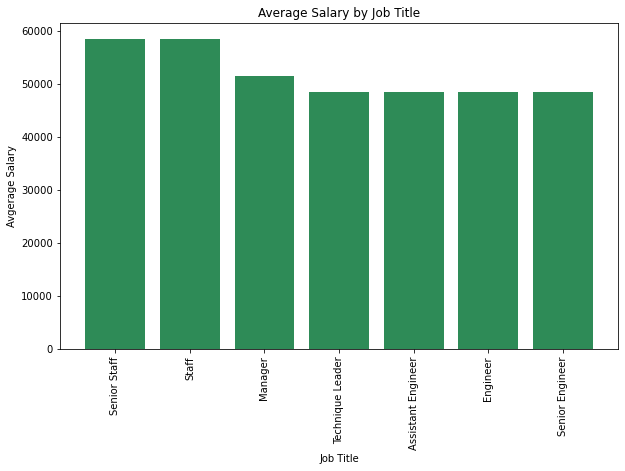

In [35]:
plt.figure(figsize=(10,6))
plt.bar(df.title, df.avg_salary, color= 'seagreen')
plt.title('Average Salary by Job Title')
plt.xlabel("Job Title")
plt.xticks(rotation= 90)
plt.ylabel('Avgerage Salary')
plt.show

In [ ]:
conn.close()
engine.dispose()